In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

<b><font size="6" color="red">ch12. 데이터 시각화</font></b>
- 시각화 라이브러리 : matplotlib, seaborn, folium(지도 시각화)
- matplotlib : 파이썬에서 가장 많이 사용하는 시각화 라이브러리. Pandas 내부에 포함되어 있음
- seaborn : matplotlib 기반으로 다양한 색, 테마, 차트 기능. groupby 기능을 추가한 라이브러리
# 1. matplotlib
- https://pypi.org/project/matplotlib/
- https://matplotlib.org/stable/api/pyplot_summary.html
## 1.1. 패키지 import 및 기본 설정

In [2]:
import matplotlib
matplotlib.__version__

'3.7.0'

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# 한글 설정(windows)

# warning 안 보이게 하는 설정
import warnings
warnings.filterwarnings(action='ignore') # 경고 메세지가 안 보이게 됨

## 1.2.그래프 그리기
- matplotlib으로 그래프 그리기 위한 단계
    1) 데이터 준비 <br>
    2) 그래프 생성 <br>
    3) 그래프 함수로 그래프 그리기 <br>
    4) 그래프 커스터마이징 <br>
    5) 그래프 출력 및 저장 <br>

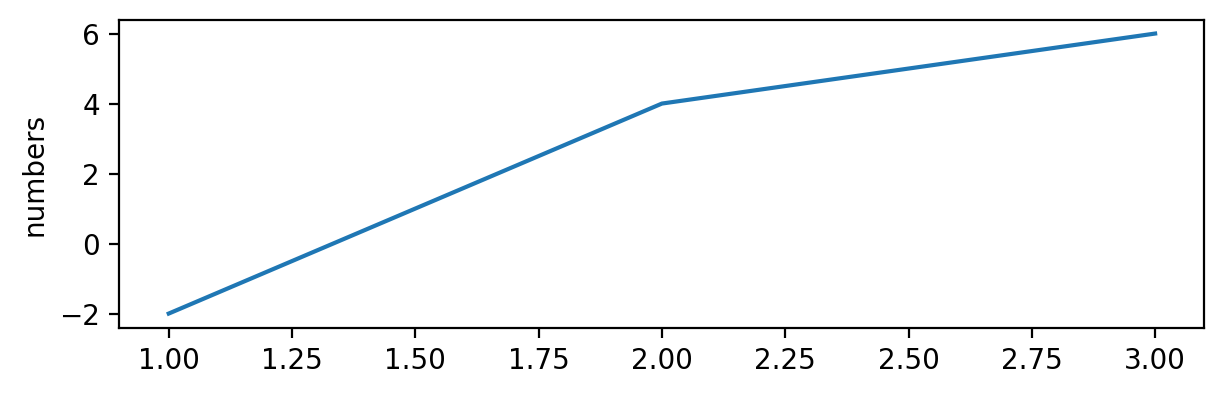

In [8]:
x = [1,2,3] #1) 데이터 준비
y = [-2,4,6]
plt.figure(figsize=(7, 2)) #2) 그래프 객체 생성하고 사이즈는 인치
plt.plot(x, y) #3) 그래프 그리기
plt.ylabel('numbers') #4) 커스터마이징
#plt.show() #5) 출력
plt.savefig('data/ch12.png', bbox_inches='tight') # 파일 출력

## 1.3.그래프 영역 나누기
### 1) subplot 함수로 subplot 추가

In [12]:
import numpy as np
x = np.arange(0,10,0.1) # x = np.linspace(0, 9.9, 100)
x.shape

(100,)

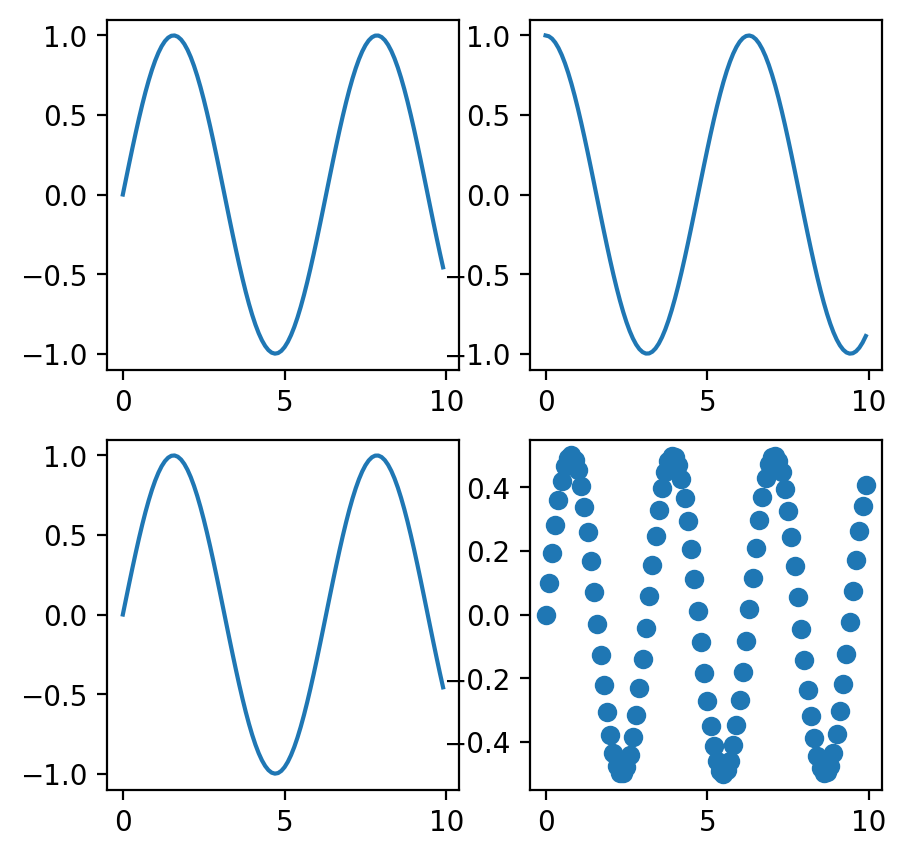

In [16]:
plt.figure(figsize=(5,5))
plt.subplot(2,2,1) #2행 1열로 만드는 subplot에서 1번째 subplot은 다음과 같이 그린다
plt.plot(x, np.sin(x)) # 선 그래프
plt.subplot(2,2,2) # 2행 2열 subplot중 3번째 subplot
plt.plot(x, np.cos(x))
plt.subplot(2,2,3)
plt.plot(x, np.sin(x))
plt.subplot(224) # 2행 2열 subplot 중 4번째 subplot
plt.scatter(x, np.sin(x)*np.cos(x)) # 점 그래프
plt.show()

### 2) subplots() 함수로 subplot 추가
- plot 함수에 색상이나 스타일을 조정(교안 14쪽)
- plot함수에서 색상이나 스타일을 조정 : https://wikidocs.net/92085

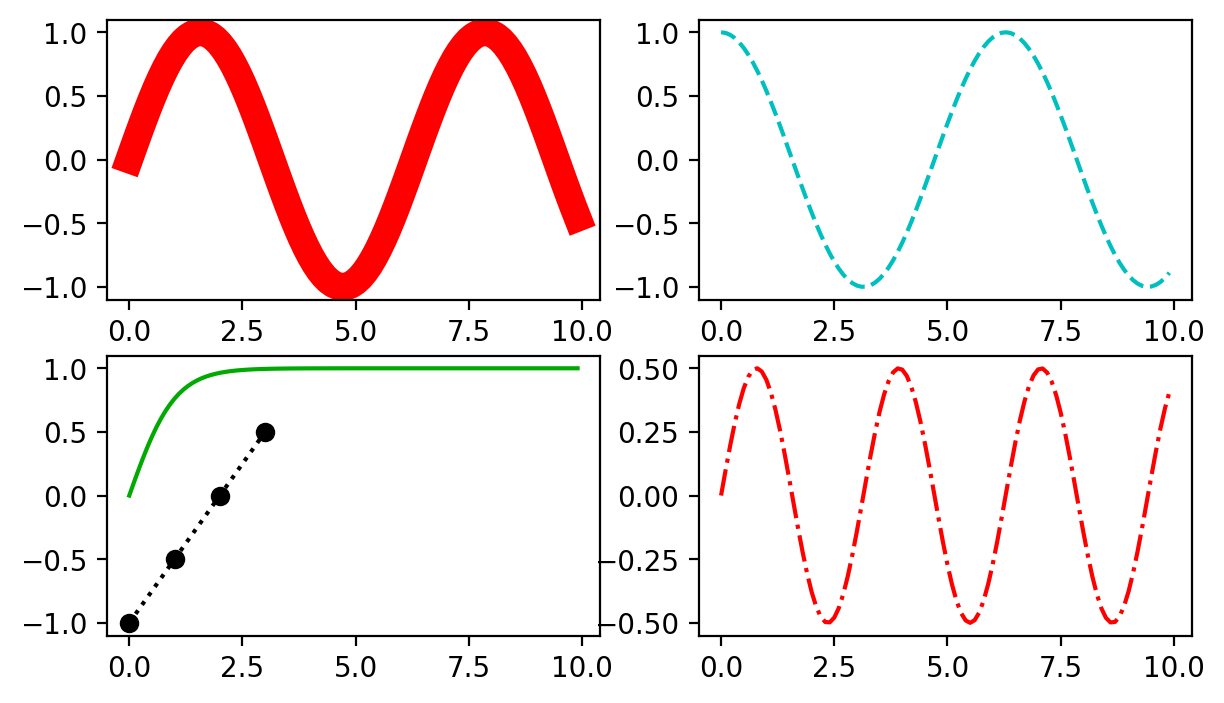

In [29]:
# 2행 2열의 subplot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7,4))
axes[0,0].plot(x, np.sin(x), c='r', linewidth=10)
axes[0,1].plot(x, np.cos(x), 'c--') # c='c', linestyle= '--'
axes[1,0].plot(x, np.tanh(x), '#00AA00') 
axes[1,0].plot([0,1,2,3],[-1, -0.5, 0, 0.5], 'ko:') # k:black, marker='o', linestyle=':'
axes[1,1].plot(x, np.sin(x)*np.cos(x), 'r-.')
plt.show()

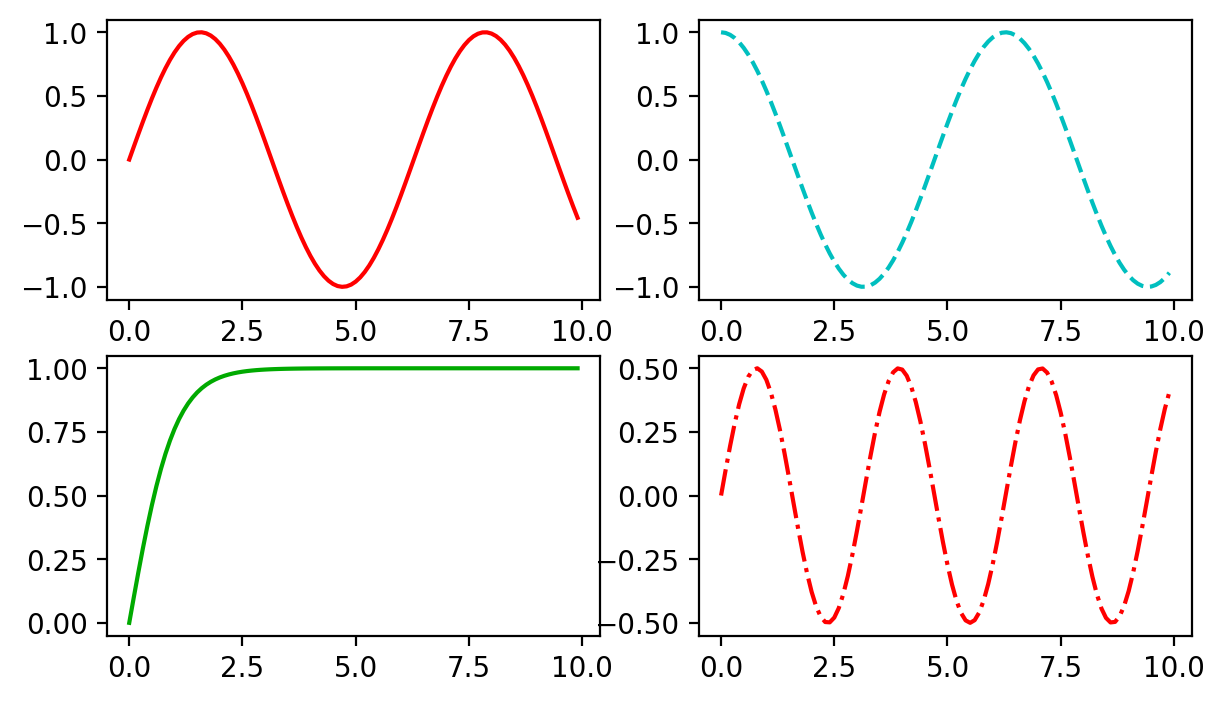

In [31]:
# 2행 2열 subplot (for문)
func = [np.sin, np.cos, np.tanh, lambda x:np.sin(x)*np.cos(x)] 
fmt = ['r','c--','#00AA00', 'r-.']
fig, axes = plt.subplots(2,2,figsize=(7,4))
list(enumerate(axes.flat))
for i, ax in enumerate(axes.flat):
    ax.plot(x, func[i](x), fmt[i])

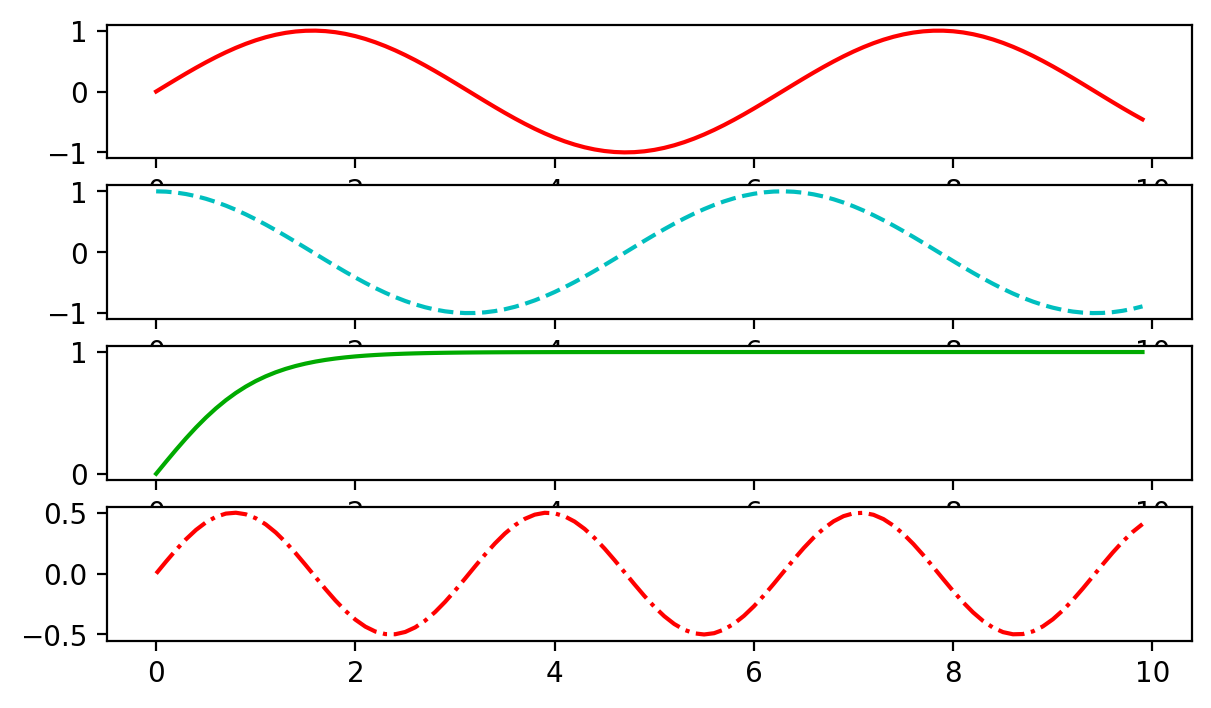

In [32]:
# 4행 1열 subplot (for문)
func = [np.sin, np.cos, np.tanh, lambda x:np.sin(x)*np.cos(x)] 
fmt = ['r','c--','#00AA00', 'r-.']
fig, axes = plt.subplots(4,1,figsize=(7,4))
list(enumerate(axes.flat))
for i, ax in enumerate(axes):
    ax.plot(x, func[i](x), fmt[i])

## 1.4.다양한 그래프 그리기
### 1) pyploy 함수들(교안 16쪽) : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html
### 2) matplotlib.pyplot.plot() : 선 그래프
### 3) pandas.DataFrame.plot()